## Importing libraries

In [1]:
# loading data
import urllib.request

# data manipulation
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
# enable interactive plot in the notebook
%matplotlib notebook

# machine learning methods
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Loading and formatting the data

In [9]:
id_num = ['85065', '85012', '85064', '85030',
      '85054', '95040']
id_n = '85065'

In [13]:
# data loading not working due to proxy in ITMO Russia

In [5]:
# API URL to underground water levels in Ljubljana aquifer
# station with id 85076 is 1279238400Lj - RTV (0261) Ljubljansko polje
url = "http://atena.ijs.si:8080/CollectorAPIServer/undergroundWater?station_id=" + id_n;
jsonStr = urllib.request.urlopen(url).read().decode('utf-8');
df = pd.read_json(jsonStr);

# converting unix timestamp to date-time object
df['Date'] = df['LastUpdatedEpoch'];
df['Date'] = pd.to_datetime(df['Date'], unit='ms');

# remove unneccessary fields
df.drop('LastUpdated', 1, inplace=True);
df.drop('LastUpdatedEpoch', 1, inplace=True);
df.drop('Region_id', 1, inplace=True);
df.drop('Region_name', 1, inplace=True);
df.drop('Station_id', 1, inplace=True);
df.drop('Station_name', 1, inplace=True);
df.drop('SystemCodeNumber', 1, inplace=True);

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [30]:
# loading data from file
filename = "data_cleaning\\data\\raw\\" + id_n + ".csv"

df = pd.read_csv(filename, delimiter=";")
df.drop('nivo v absolut. kotah (m n.m.)', 1, inplace=True)
df.rename(index=str, columns={'Nivo v absolutnih kotah (m n.m.)': 'Value', 'Datum': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'],  format='%d.%m.%Y',);
df

,Date,Value
0,2006-01-01,276.488
1,2006-01-02,276.482
2,2006-01-03,276.494
3,2006-01-04,276.500
4,2006-01-05,276.500
5,2006-01-06,276.493
6,2006-01-07,276.476
7,2006-01-08,276.457
8,2006-01-09,276.440
9,2006-01-10,276.420


## Checking loaded data

In [51]:
# string/tabular view
# len(jsonStr), jsonStr[0:100] and df[0:5]
df[0:5]

,Value,Date
0,276.488,2006-01-01
1,276.482,2006-01-02
2,276.494,2006-01-03
3,276.500,2006-01-04
4,276.500,2006-01-05


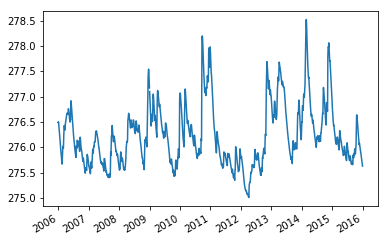

In [31]:
# plotting the data
# format date axis
fig, ax = plt.subplots(); fig.autofmt_xdate();
# plot
ax.plot(df['Date'], df['Value']);
# show plot
plt.show();

## Loading some additional data for modeling (weather)

In [53]:
pd.set_option('display.max_rows', 5000)
df['Date']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
5      2006-01-06
6      2006-01-07
7      2006-01-08
8      2006-01-09
9      2006-01-10
10     2006-01-11
11     2006-01-12
12     2006-01-13
13     2006-01-14
14     2006-01-15
15     2006-01-16
16     2006-01-17
17     2006-01-18
18     2006-01-19
19     2006-01-20
20     2006-01-21
21     2006-01-22
22     2006-01-23
23     2006-01-24
24     2006-01-25
25     2006-01-26
26     2006-01-27
27     2006-01-28
28     2006-01-29
29     2006-01-30
30     2006-01-31
31     2006-02-01
32     2006-02-02
33     2006-02-03
34     2006-02-04
35     2006-02-05
36     2006-02-06
37     2006-02-07
38     2006-02-08
39     2006-02-09
40     2006-02-10
41     2006-02-11
42     2006-02-12
43     2006-02-13
44     2006-02-14
45     2006-02-15
46     2006-02-16
47     2006-02-17
48     2006-02-18
49     2006-02-19
50     2006-02-20
51     2006-02-21
52     2006-02-22
53     2006-02-23
54     2006-02-24
55     200

In [33]:
# API URL to underground water levels in Ljubljana aquifer
# station with id 85076 is 1279238400Lj - RTV (0261) Ljubljansko polje
#url = "http://atena.ijs.si:8080/CollectorAPIServer/weather?time_from=31/12/2009&time_to=01/01/2017&city=Ljubljana";
#jsonStr = urllib.request.urlopen(url).read().decode('utf-8');
#dw = pd.read_json(jsonStr);
dw = pd.read_json('weather/weather.json')

# converting unix timestamp to date-time object
dw['Date'] = dw['LastUpdatedEpoch'];
dw['Date'] = pd.to_datetime(dw['Date'] + 2 * 60 * 60 * 1000, unit='ms').dt.round("1d");
dw.set_index('Date', inplace=True);

dw.drop('City', 1, inplace=True);
dw.drop('LastUpdated', 1, inplace=True);
dw.drop('LastUpdatedEpoch', 1, inplace=True);
dw.drop('Sensor_id', 1, inplace=True);
dw.drop('Sensor_name', 1, inplace=True);
dw.drop('SystemCodeNumber', 1, inplace=True);


In [34]:
dw[0:5]

,CloudCover,New_snow_blanket,Percipitation,Snow_blanket,Sun_duration,TemperatureAvg,TemperatureMax,TemperatureMin
Date,,,,,,,,
2010-01-01,97,0,13.8,0,0.0,6.9,7.7,5.5
2010-01-02,100,0,4.6,0,0.0,2.5,6.7,0.7
2010-01-03,7,0,7.9,0,8.0,-0.5,3.4,-2.6
2010-01-04,77,0,0.0,0,0.8,-3.3,-1.6,-6.4
2010-01-05,100,10,5.8,10,0.0,-1.5,-0.5,-2.3


## Data Fusion

In [35]:
# make date a key in our data
df.set_index('Date', inplace=True);

In [36]:
df[0:5]

,Value
Date,
2006-01-01,276.488
2006-01-02,276.482
2006-01-03,276.494
2006-01-04,276.500
2006-01-05,276.500


In [37]:
# generate fused dataset
ds = pd.concat([df, dw], axis=1);

In [38]:
ds = ds.loc['2010-01-01':'2015-01-01']

In [39]:
# let's check it
ds[0:10]

,Value,CloudCover,New_snow_blanket,Percipitation,Snow_blanket,Sun_duration,TemperatureAvg,TemperatureMax,TemperatureMin
Date,,,,,,,,,
2010-01-01,277.07,97.0,0.0,13.8,0.0,0.0,6.9,7.7,5.5
2010-01-02,277.07,100.0,0.0,4.6,0.0,0.0,2.5,6.7,0.7
2010-01-03,277.07,7.0,0.0,7.9,0.0,8.0,-0.5,3.4,-2.6
2010-01-04,277.07,77.0,0.0,0.0,0.0,0.8,-3.3,-1.6,-6.4
2010-01-05,277.06,100.0,10.0,5.8,10.0,0.0,-1.5,-0.5,-2.3
2010-01-06,277.05,100.0,9.0,10.4,18.0,0.0,-0.7,0.5,-2.0
2010-01-07,277.02,100.0,6.0,4.4,20.0,0.0,0.6,1.2,-0.6
2010-01-08,277.00,100.0,1.0,1.7,16.0,0.0,-0.2,0.7,-0.5
2010-01-09,276.98,100.0,28.0,38.6,44.0,0.0,0.7,1.5,-0.5


# .........

In [42]:
ds['DValue'] = ds['Value'] - ds['Value'].shift(1)

In [43]:
#dnew = ds
#for i in range(26):
#    dnew['Sun_duration' + '_shift_' + str(i)+'d'] = ds['Sun_duration'].shift(i)
#for i in range(50,101,10):
#    dnew['Sun_duration' + '_shift_' + str(i)+'d'] = ds['Sun_duration'].shift(i)

In [44]:
#shift of data for n days
def shift_of_data(string, data, new_data):
    for i in range(26):
        new_data[string + '_shift_' + str(i)+'d'] = data[string].shift(i)
    for i in range(30,101,10):
        new_data[string + '_shift_' + str(i)+'d'] = data[string].shift(i)

In [45]:
import copy
dnew = copy.deepcopy(ds)

data_names = ['CloudCover', 'New_snow_blanket', 'Percipitation','Snow_blanket',
              'Sun_duration', 'TemperatureAvg', 'TemperatureMax', 'TemperatureMin']

for string in data_names:
    shift_of_data(string, ds, dnew)

In [46]:
dnew

,Value,CloudCover,New_snow_blanket,Percipitation,Snow_blanket,Sun_duration,TemperatureAvg,TemperatureMax,TemperatureMin,DValue,...,TemperatureMin_shift_24d,TemperatureMin_shift_25d,TemperatureMin_shift_30d,TemperatureMin_shift_40d,TemperatureMin_shift_50d,TemperatureMin_shift_60d,TemperatureMin_shift_70d,TemperatureMin_shift_80d,TemperatureMin_shift_90d,TemperatureMin_shift_100d
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,277.07,97.0,0.0,13.8,0.0,0.0,6.9,7.7,5.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,277.07,100.0,0.0,4.6,0.0,0.0,2.5,6.7,0.7,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,277.07,7.0,0.0,7.9,0.0,8.0,-0.5,3.4,-2.6,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,277.07,77.0,0.0,0.0,0.0,0.8,-3.3,-1.6,-6.4,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,277.06,100.0,10.0,5.8,10.0,0.0,-1.5,-0.5,-2.3,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,277.05,100.0,9.0,10.4,18.0,0.0,-0.7,0.5,-2.0,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,277.02,100.0,6.0,4.4,20.0,0.0,0.6,1.2,-0.6,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,277.00,100.0,1.0,1.7,16.0,0.0,-0.2,0.7,-0.5,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-09,276.98,100.0,28.0,38.6,44.0,0.0,0.7,1.5,-0.5,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dnew.corr()

,Value,CloudCover,New_snow_blanket,Percipitation,Snow_blanket,Sun_duration,TemperatureAvg,TemperatureMax,TemperatureMin,DValue,...,TemperatureMin_shift_24d,TemperatureMin_shift_25d,TemperatureMin_shift_30d,TemperatureMin_shift_40d,TemperatureMin_shift_50d,TemperatureMin_shift_60d,TemperatureMin_shift_70d,TemperatureMin_shift_80d,TemperatureMin_shift_90d,TemperatureMin_shift_100d
Value,1.000000,0.274829,0.094755,0.038737,0.122265,-0.330819,-0.352788,-0.377243,-0.299330,0.027445,...,-0.222854,-0.217654,-0.191839,-0.140386,-0.100075,-0.063316,0.004597,0.054028,0.111038,0.165626
CloudCover,0.274829,1.000000,0.142080,0.240523,0.204792,-0.879486,-0.420237,-0.529976,-0.205513,0.118811,...,-0.189587,-0.190936,-0.162989,-0.117958,-0.034637,-0.021132,0.043118,0.085148,0.168782,0.213092
New_snow_blanket,0.094755,0.142080,1.000000,0.162416,0.552036,-0.143944,-0.213110,-0.221492,-0.189670,-0.044847,...,-0.116950,-0.114019,-0.104969,-0.105312,-0.079688,-0.071009,-0.047267,-0.021147,0.018785,0.055849
Percipitation,0.038737,0.240523,0.162416,1.000000,0.059274,-0.216690,-0.053284,-0.074840,0.035254,0.457381,...,0.070416,0.078024,0.076996,0.074194,0.050849,0.079206,0.064475,0.061871,0.067332,0.071464
Snow_blanket,0.122265,0.204792,0.552036,0.059274,1.000000,-0.233328,-0.392907,-0.398325,-0.374253,-0.076783,...,-0.242908,-0.239004,-0.222847,-0.226009,-0.143997,-0.114830,-0.091251,-0.063411,0.017374,0.080499
Sun_duration,-0.330819,-0.879486,-0.143944,-0.216690,-0.233328,1.000000,0.621372,0.706165,0.410423,-0.113747,...,0.309619,0.309371,0.273117,0.190799,0.083994,0.030543,-0.077083,-0.161566,-0.264959,-0.337269
TemperatureAvg,-0.352788,-0.420237,-0.213110,-0.053284,-0.392907,0.621372,1.000000,0.979654,0.948984,-0.017859,...,0.671144,0.667287,0.630613,0.549153,0.438306,0.346783,0.198181,0.073543,-0.082286,-0.202225
TemperatureMax,-0.377243,-0.529976,-0.221492,-0.074840,-0.398325,0.706165,0.979654,1.000000,0.893621,-0.031584,...,0.643569,0.640619,0.598855,0.512701,0.396291,0.307018,0.157273,0.034813,-0.121687,-0.241498
TemperatureMin,-0.299330,-0.205513,-0.189670,0.035254,-0.374253,0.410423,0.948984,0.893621,1.000000,0.029301,...,0.696912,0.690882,0.663313,0.596141,0.499146,0.410522,0.276481,0.152933,0.009234,-0.109120
DValue,0.027445,0.118811,-0.044847,0.457381,-0.076783,-0.113747,-0.017859,-0.031584,0.029301,1.000000,...,0.079560,0.085840,0.082213,0.086706,0.059181,0.088197,0.106599,0.082514,0.096602,0.099265


In [48]:
#correlation for shifts
#plt.matshow(dnew.corr())

In [49]:
#average for last n days
def average_last_n_days(string, data, new_data):
    for i in range(26):
        new_data[string + '_average_' + str(i)+'d'] = data[string].rolling(i).sum()/i
    for i in range(30,101,10):
        new_data[string + '_average_' + str(i)+'d'] = data[string].rolling(i).sum()/i

In [50]:
#for i in range(26):
#    dnew['Sun_duration' + '_sum_' + str(i)+'d'] = ds['Sun_duration'].rolling(i).sum()

In [51]:
#data_names = ['CloudCover', 'New_snow_blanket', 'Percipitation','Snow_blanket',
#              'Sun_duration', 'TemperatureAvg', 'TemperatureMax', 'TemperatureMin']

#dnew2 = copy.deepcopy(ds)
for string in data_names:
    average_last_n_days(string, ds, dnew)  

In [52]:
#dnew2.corr()

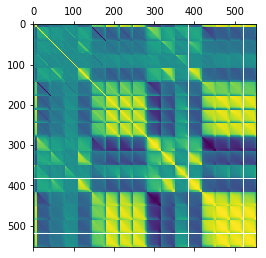

In [53]:
# correlation for shifts and average
plt.matshow(dnew.corr())

In [73]:
dnew.corr()['DValue']

Value                            0.027445
CloudCover                       0.118811
New_snow_blanket                -0.044847
Percipitation                    0.457381
Snow_blanket                    -0.076783
Sun_duration                    -0.113747
TemperatureAvg                  -0.017859
TemperatureMax                  -0.031584
TemperatureMin                   0.029301
DValue                           1.000000
CloudCover_shift_0d              0.118811
CloudCover_shift_1d              0.199770
CloudCover_shift_2d              0.235393
CloudCover_shift_3d              0.206290
CloudCover_shift_4d              0.143834
CloudCover_shift_5d              0.100566
CloudCover_shift_6d              0.073929
CloudCover_shift_7d              0.037295
CloudCover_shift_8d              0.019087
CloudCover_shift_9d              0.028871
CloudCover_shift_10d             0.031756
CloudCover_shift_11d             0.030350
CloudCover_shift_12d             0.024096
CloudCover_shift_13d             0

In [74]:
# sort for corelation with 'DValue' from max to min
dsort = dnew.corr().sort_values(['DValue'], ascending = False)

In [75]:
pd.set_option('display.max_rows', 1000)
dsort['DValue']

DValue                           1.000000
Percipitation_average_3d         0.780814
Percipitation_average_4d         0.780157
Percipitation_average_5d         0.748609
Percipitation_average_6d         0.709014
Percipitation_average_2d         0.687585
Percipitation_average_7d         0.669847
Percipitation_average_8d         0.637528
Percipitation_shift_1d           0.629819
Percipitation_average_9d         0.610103
Percipitation_average_10d        0.590176
Percipitation_average_11d        0.575449
Percipitation_average_12d        0.559235
Percipitation_average_13d        0.541071
Percipitation_average_14d        0.524484
Percipitation_average_15d        0.505901
Percipitation_average_16d        0.485387
Percipitation_shift_2d           0.480551
Percipitation_average_17d        0.468426
Percipitation_average_18d        0.461497
Percipitation_average_1d         0.457381
Percipitation                    0.457381
Percipitation_shift_0d           0.457381
Percipitation_average_19d        0

<IPython.core.display.Javascript object>


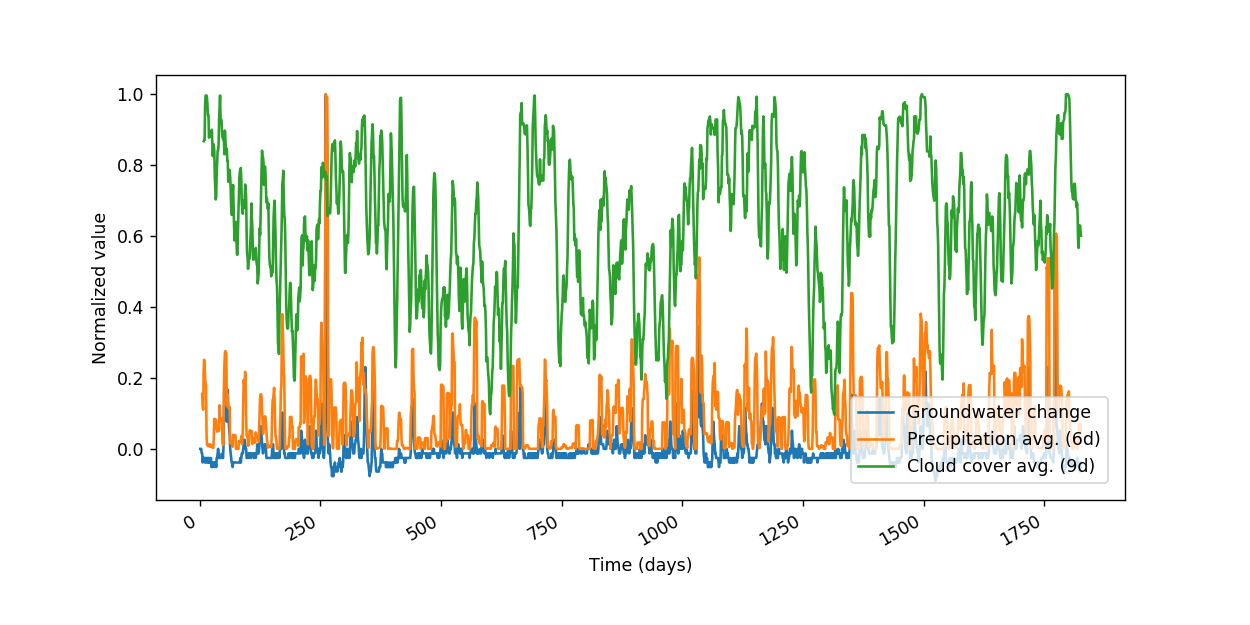

In [76]:
# ploted corelated quantities
fig, ax = plt.subplots(); fig.autofmt_xdate();
fig.set_size_inches(10, 5)
ax.plot(range(len(dnew['DValue'])), dnew['DValue'] / np.max(np.abs(dnew['DValue']),axis=0), label="Groundwater change");
ax.plot(range(len(dnew['DValue'])), dnew['Percipitation_average_6d'] / np.max(np.abs(dnew['Percipitation_average_6d']),axis=0), label="Precipitation avg. (6d)");
ax.plot(range(len(dnew['DValue'])), dnew['CloudCover_average_9d'] / np.max(np.abs(dnew['CloudCover_average_9d']),axis=0), label="Cloud cover avg. (9d)");
ax.legend(loc=4, borderaxespad=1)
plt.xlabel('Time (days)')
plt.ylabel('Normalized value')
plt.show();

In [77]:
fig.savefig('correlations.png', dpi=300)

In [78]:
dsort = dnew.corr().sort_values(['DValue'], ascending = False)

Percipitation = dsort['DValue'].index[1]
Sun = dsort['DValue'].index[-1]
for i in dsort['DValue'].index:
    if 'CloudCover' in i:
        Cloud = i
        break

In [102]:
#create new data frame for chosen colerated quantities
data_corelated = pd.DataFrame()

corelated = [Percipitation,
             Cloud,
             Sun,
             #'Percipitation_average_6d',
             #'Percipitation_average_10d',
             #'Percipitation_average_25d',
             #'CloudCover_average_9d',
             #'Sun_duration_average_9d'
            ]

corelated = [Percipitation,
             Cloud,
            'Percipitation_average_6d',
             'Percipitation_average_10d',
             'Percipitation_average_25d',
             'CloudCover_average_18d',             
             'CloudCover_average_9d',
             'Snow_blanket_shift_50d',
             'Snow_blanket_shift_30d',
             'New_snow_blanket_average_60d',
             'Sun_duration_average_10d',
             'Sun_duration_average_3d',
             'TemperatureAvg_average_3d',
             
            ]


In [103]:
corelated

['Percipitation_average_3d',
 'CloudCover_average_4d',
 'Percipitation_average_6d',
 'Percipitation_average_10d',
 'Percipitation_average_25d',
 'CloudCover_average_18d',
 'CloudCover_average_9d',
 'Snow_blanket_shift_50d',
 'Snow_blanket_shift_30d',
 'New_snow_blanket_average_60d',
 'Sun_duration_average_10d',
 'Sun_duration_average_3d',
 'TemperatureAvg_average_3d']

In [101]:
data_corelated['DValue'] = copy.deepcopy(dnew['DValue'])

for corelated in corelated:
    data_corelated[corelated] = copy.deepcopy(dnew[corelated])


In [80]:
data_corelated

,DValue,Percipitation_average_3d,CloudCover_average_4d,TemperatureMin_average_0d,Percipitation_average_6d,Percipitation_average_10d,Percipitation_average_25d,CloudCover_average_18d,CloudCover_average_9d,Snow_blanket_shift_50d,Snow_blanket_shift_30d,New_snow_blanket_average_60d,Sun_duration_average_10d,Sun_duration_average_3d,TemperatureAvg_average_3d
Date,,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,0.00,8.766667e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667e+00,2.966667e+00
2010-01-04,0.00,4.166667e+00,70.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.933333e+00,-4.333333e-01
2010-01-05,-0.01,4.566667e+00,71.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.933333e+00,-1.766667e+00
2010-01-06,-0.01,5.400000e+00,71.00,NaN,7.083333e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667e-01,-1.833333e+00
2010-01-07,-0.03,6.866667e+00,94.25,NaN,5.516667e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.220446e-16,-5.333333e-01
2010-01-08,-0.02,5.500000e+00,100.00,NaN,5.033333e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.220446e-16,-1.000000e-01
2010-01-09,-0.02,1.490000e+01,100.00,NaN,1.015000e+01,NaN,NaN,NaN,86.777778,NaN,NaN,NaN,NaN,2.220446e-16,3.666667e-01


# Learn

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import Normalizer

from sklearn.metrics import mean_squared_error, r2_score

In [82]:
n=data_corelated['DValue'].isnull().sum()
data_corelated = data_corelated.fillna(0); #missing data replace vith 0
n

1

In [83]:
#create arrays x (corelated) and y ('DValue')
#y = dnew['Value']
y = data_corelated['DValue']
y = y.values.astype(np.float)[100:]
X = data_corelated.iloc[:, 1:len(corelated)]
X= X.values.astype(np.float)[100:]

In [84]:
(y.shape,X.shape)

((1727,), (1727, 14))

In [85]:
(np.isnan(y).any(),np.isnan(X).any())

(False, False)

In [86]:
#choose regressor

regressor = linear_model.LinearRegression();
#regressor = DecisionTreeRegressor();
#regressor = RandomForestRegressor();
#regressor = SVR();
#regressor = GradientBoostingRegressor();

In [87]:
#predict
predicted = cross_val_predict(regressor, X, y, cv = 3)

<IPython.core.display.Javascript object>


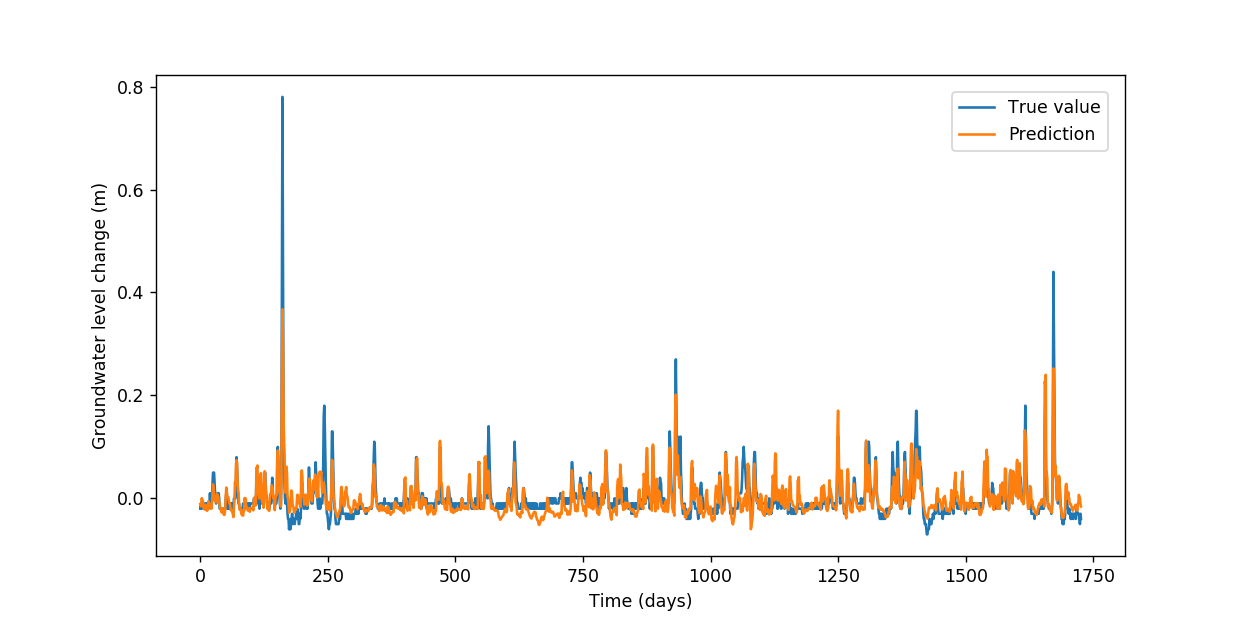

In [104]:
#plot predicted values and real value
fig, ax = plt.subplots(); 
#fig.autofmt_xdate();
fig.set_size_inches(10, 5)
ax.plot(range(len(y)), y, label="True value")
ax.plot(range(len(y)), predicted, label="Prediction");
ax.legend(loc=1, borderaxespad=1)
plt.xlabel('Time (days)')
plt.ylabel('Groundwater level change (m)')
plt.show();

In [89]:
fig.savefig('./graphs/prediction_'+'id='+ id_n + '_13features' +'.png', dpi=300)

In [105]:
#evaluate results

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted);
(mse, r2)

(0.0006998877082529172, 0.6297895783670469)

In [106]:
#evaluation for all regressors
regressor_list = (linear_model.LinearRegression(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor(),
            SVR(),
            MLPRegressor()
            )

for regressor in regressor_list:
    predicted2 = cross_val_predict(regressor, X, y, cv = 3)
    mse = mean_squared_error(y, predicted2)
    r2 = r2_score(y, predicted2);
    print(mse, r2)

0.0006998877082529172 0.6297895783670469
0.0014940938042848836 0.20968879618670722
0.000701039374638103 0.6291803965039957
0.0006571040567786306 0.6524202853569306
0.00710824352063723 -2.759954346696225
0.047265721677653146 -24.00152888061075


In [107]:
#sum
value = ds['Value']
value = value.values.astype(np.float)[100:]

predicted_value = []
predicted_value.append(value[0])
n=1
for i in predicted[1:]:
    predicted_value.append(predicted_value[n-1] + i)
    n += 1

<IPython.core.display.Javascript object>


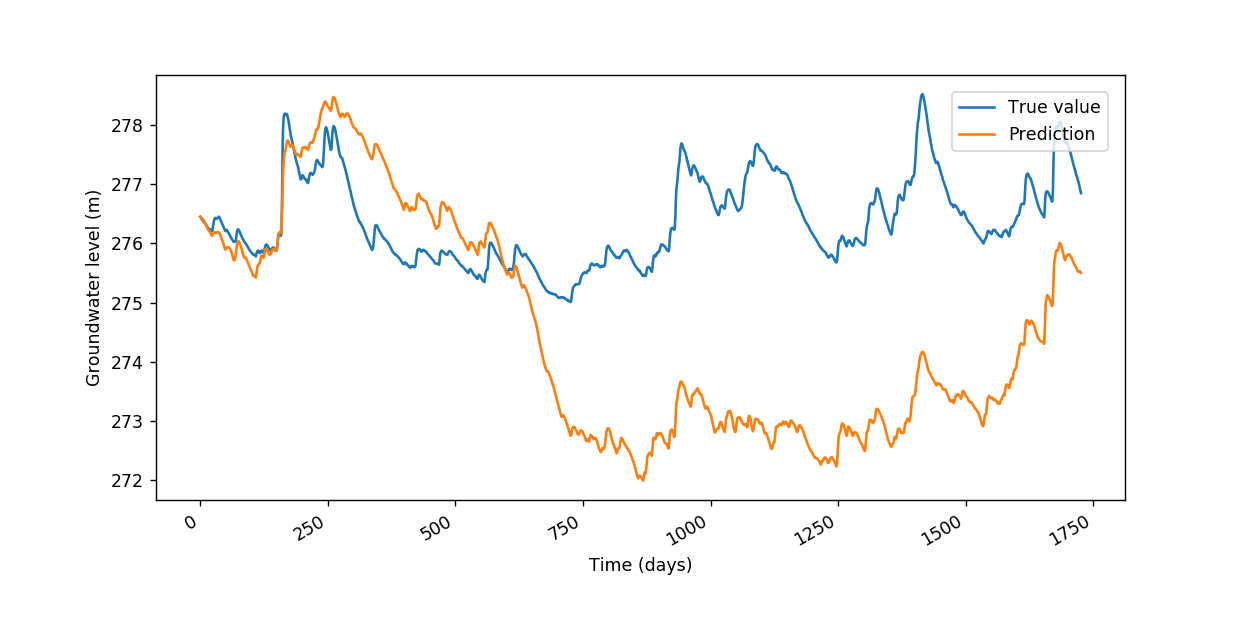

In [110]:
fig, ax = plt.subplots(); fig.autofmt_xdate();
fig.set_size_inches(10, 5)
ax.plot(range(len(value)), value, label="True value");
ax.plot(range(len(value)), predicted_value, label="Prediction");
ax.legend(loc=1, borderaxespad=1)
plt.xlabel('Time (days)')
plt.ylabel('Groundwater level (m)')
plt.show();

In [109]:
#fig.savefig('./graphs/prediction_cum_'+'id='+ id_n + '_13features' +'.png', dpi=300)